<a href="https://colab.research.google.com/github/leingang/Data-Science-For-Beginners/blob/main/1-Introduction/04-stats-and-probability/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Probability and Statistics
|
In this notebook, we will play around with some of the concepts we have previously discussed. Many concepts from probability and statistics are well-represented in major libraries for data processing in Python, such as `numpy` and `pandas`.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


## Random Variables and Distributions

Let's start with drawing a sample of 30 variables from a uniform distribution from 0 to 9. We will also compute mean and variance.

In [3]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [8, 7, 1, 2, 0, 9, 4, 1, 8, 6, 2, 8, 3, 9, 0, 1, 9, 1, 1, 9, 10, 3, 3, 10, 6, 7, 8, 0, 0, 5]
Mean = 4.7
Variance = 12.276666666666667


To visually estimate how many different values are there in the sample, we can plot the **histogram**:

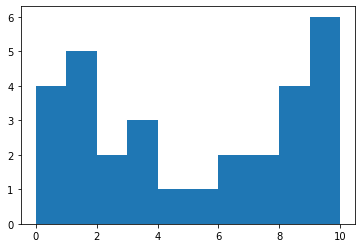

In [4]:
plt.hist(sample)
plt.show()

## Analyzing Real Data

Mean and variance are very important when analyzing real-world data. Let's load the data about baseball players from [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/leingang/Data-Science-For-Beginners/main/data/SOCR_MLB.tsv",
                 sep='\t',
                 header=None,
                 names=['Name','Team','Role','Height','Weight','Age'])
df

,Name,Team,Role,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


> We are using a package called **Pandas** here for data analysis. We will talk more about Pandas and working with data in Python later in this course.

Let's compute average values for age, height and weight:

In [7]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height     73.697292
Weight    201.689255
dtype: float64

Now let's focus on height, and compute standard deviation and variance: 

In [ ]:
print(list(df['Height'])[:20])

[180.0, 215.0, 210.0, 210.0, 188.0, 176.0, 209.0, 200.0, 231.0, 180.0, 188.0, 180.0, 185.0, 160.0, 180.0, 185.0, 197.0, 189.0, 185.0, 219.0]


In [8]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 73.6972920696325
Variance = 5.316798081118081
Standard Deviation = 2.305818310517566


In addition to mean, it makes sense to look at median value and quartiles. They can be visualized using **box plot**:

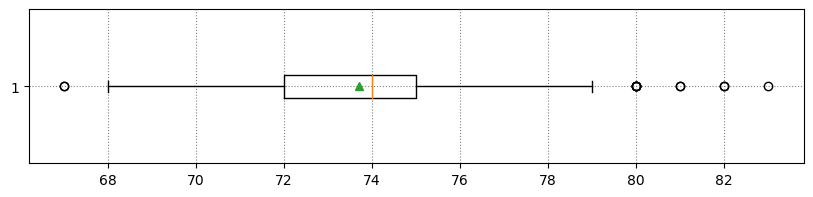

In [ ]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'],vert=False,showmeans=True)
plt.grid(color='gray',linestyle='dotted')
plt.show()

We can also make box plots of subsets of our dataset, for example, grouped by player role.

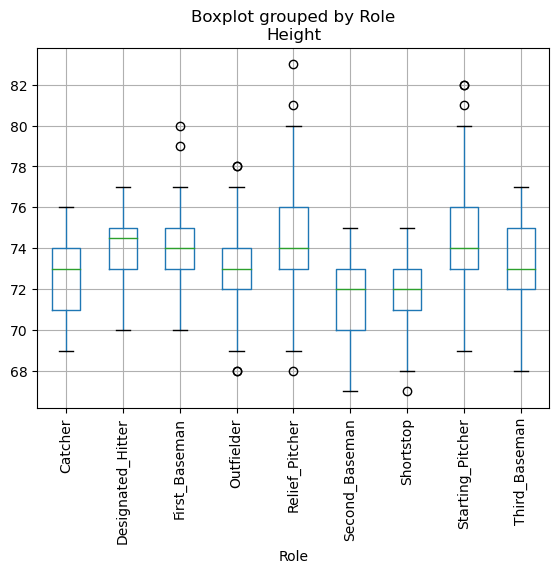

In [ ]:
df.boxplot(column='Height',by='Role')
plt.xticks(rotation='vertical')
plt.show()

> **Note**: This diagram suggests, that on average, height of first basemen is higher that height of second basemen. Later we will learn how we can test this hypothesis more formally, and how to demonstrate that our data is statistically significant to show that.  

Age, height and weight are all continuous random variables. What do you think their distribution is? A good way to find out is to plot the histogram of values: 

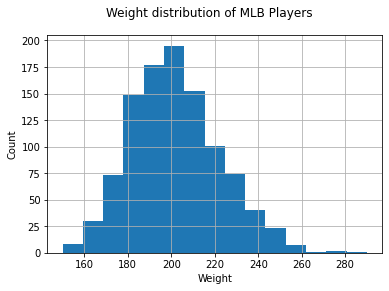

In [11]:
df['Weight'].hist(bins=15)
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

## Normal Distribution

Let's create an artificial sample of weights that follows normal distribution with the same mean and variance as real data:

In [12]:
generated = np.random.normal(mean,std,1000)
generated[:20]

array([74.70764106, 71.2155063 , 71.28741735, 73.50235319, 73.29052598,
       75.60892081, 74.87893211, 65.23944206, 73.10962441, 72.54576921,
       76.56749567, 74.38340668, 76.06237255, 75.70946011, 71.31920325,
       73.47653247, 73.56421204, 73.12018873, 72.01378348, 74.85741088])

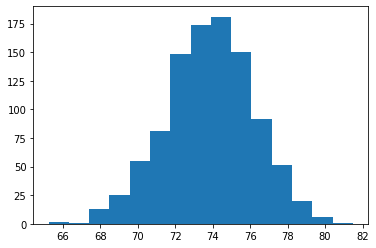

In [13]:
plt.hist(generated,bins=15)
plt.show()

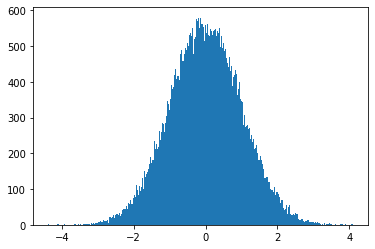

In [14]:
plt.hist(np.random.normal(0,1,50000),bins=300)
plt.show()

Since most values in real life are normally distributed, it means we should not use uniform random number generator to generate sample data. Here is what happens if we try to generate weights with uniform distribution (generated by `np.random.rand`):

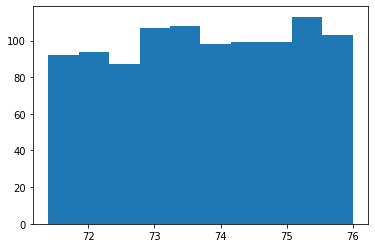

In [15]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.hist(wrong_sample)
plt.show()

## Confidence Intervals

Let's now calculate confidence intervals for the weights and heights of baseball players. We will use the code [from this stackoverflow discussion](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):

In [16]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f}±{h:.2f}")

p=0.85, mean = 201.73±0.94
p=0.90, mean = 201.73±1.08
p=0.95, mean = 201.73±1.28


## Hypothesis Testing

Let's explore different roles in our baseball players dataset:

In [17]:
df.groupby('Role').agg({ 'Height' : 'mean', 'Weight' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

,Height,Weight,Count
Role,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.163636,221
Third_Baseman,73.044444,200.955556,45


Let's test the hypothesis that First Basemen are higher then Second Basemen. The simplest way to do it is to test the confidence intervals:

In [18]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 73.62..74.38, 2nd basemen height: 71.04..71.69
Conf=0.90, 1st basemen height: 73.56..74.44, 2nd basemen height: 70.99..71.73
Conf=0.95, 1st basemen height: 73.47..74.53, 2nd basemen height: 70.92..71.81


We can see that intervals do not overlap.

More statistically correct way to prove the hypothesis is to use **Student t-test**:

In [19]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']],
                       df.loc[df['Role']=='Second_Baseman',['Height']],
                       equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 7.65
P-value: 9.137321189738925e-12


Two values returned by the `ttest_ind` functions are:
* p-value can be considered as the probability of two distributions having the same mean. In our case, it is very low, meaning that there is strong evidence supporting that first basemen are taller
* t-value is the intermediate value of normalized mean difference that is used in t-test, and it is compared against threshold value for a given confidence value 

## Simulating Normal Distribution with Central Limit Theorem

Pseudo-random generator in Python is designed to give us uniform distribution. If we want to create a generator for normal distribution, we can use central limit theorem. To get a normally distributed value we will just compute a mean of a uniform-generated sample.

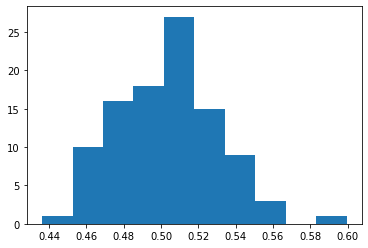

In [20]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.hist(sample)
plt.show()

## Correlation and Evil Baseball Corp

Correlation allows us to find inner connection between data sequences. In our toy example, let's pretend there is an evil baseball corporation that pays it's players according to their height - the taller the player is, the more money he/she gets. Suppose there is a base salary of $1000, and an additional bonus from $0 to $100, depending on height. We will take the real players from MLB, and compute their imaginary salaries:

In [ ]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights,salaries))[:10])

[(74, 1075.2469071629068), (74, 1075.2469071629068), (72, 1053.7477908306478), (72, 1053.7477908306478), (73, 1064.4973489967772), (69, 1021.4991163322591), (69, 1021.4991163322591), (71, 1042.9982326645181), (76, 1096.746023495166), (71, 1042.9982326645181)]


Let's now compute covariance and correlation of those sequences. `np.cov` will give us so-called **covariance matrix**, which is an extension of covariance to multiple variables. The element $M_{ij}$ of the covariance matrix $M$ is a correlation between input variables $X_i$ and $X_j$, and diagonal values $M_{ii}$ is the variance of $X_{i}$. Similarly, `np.corrcoef` will give us **correlation matrix**.

In [ ]:
print(f"Covariance matrix:\n{np.cov(heights,salaries)}")
print(f"Covariance = {np.cov(heights,salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights,salaries)[0,1]}")

Covariance matrix:
[[  5.31679808  57.15323023]
 [ 57.15323023 614.37197275]]
Covariance = 57.15323023054467
Correlation = 1.0


Correlation equal to 1 means that there is a strong **linear relation** between two variables. We can visually see the linear relation by plotting one value against the other:

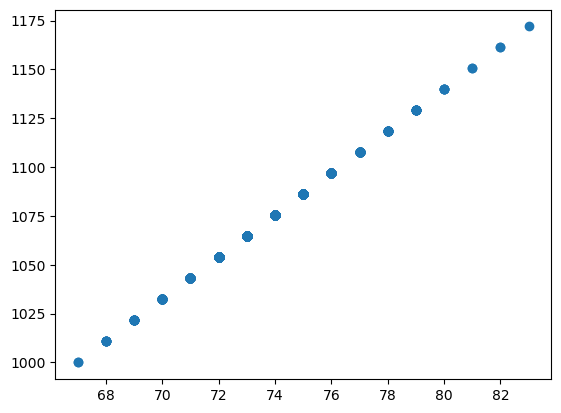

In [ ]:
plt.scatter(heights,salaries)
plt.show()

Let's see what happens if the relation is not linear. Suppose that our corporation decided to hide the obvious linear dependency between heights and salaries, and introduced some non-linearity into the formula, such as `sin`:

In [ ]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights,salaries)[0,1]}")

Correlation = 0.9835304456670811


In this case, the correlation is slightly smaller, but it is still quite high. Now, to make the relation even less obvious, we might want to add some extra randomness by adding some random variable to the salary. Let's see what happens:

In [ ]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights,salaries)[0,1]}")

Correlation = 0.9384710733057905


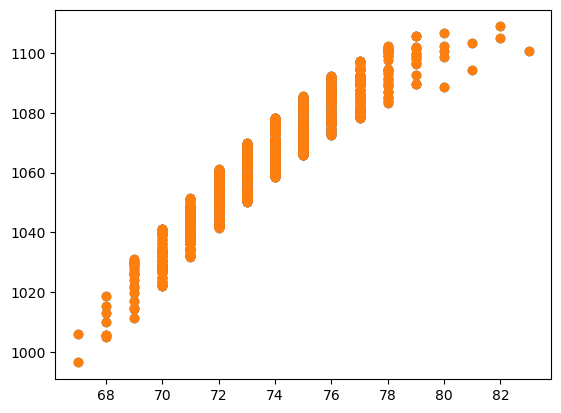

In [ ]:
plt.scatter(heights, salaries)
plt.show()

> Can you guess why the dots line up into vertical lines like this?

We have observed the correlation between artificially engineered concept like salary and the observed variable *height*. Let's also see if the two observed variables, such as height and weight, also correlate:

In [21]:
np.corrcoef(df['Height'],df['Weight'])

array([[ 1., nan],
       [nan, nan]])

Unfortunately, we did not get any results - only some strange `nan` values. This is due to the fact that some of the values in our series are undefined, represented as `nan`, which causes the result of the operation to be undefined as well. By looking at the matrix we can see that `Weight` is problematic column, because self-correlation between `Height` values has been computed.

> This example shows the importance of **data preparation** and **cleaning**. Without proper data we cannot compute anything.

Let's use `fillna` method to fill the missing values, and compute the correlation: 

In [ ]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

The is indeed a correlation, but not such a strong one as in our artificial example. Indeed, if we look at the scatter plot of one value against the other, the relation would be much less obvious:

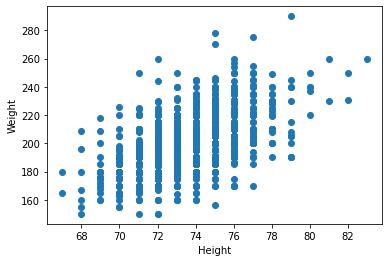

In [22]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## Conclusion

In this notebook, we have learnt how to perform basic operations on data to compute statistical functions. We now know how to use sound apparatus of math and statistics in order to prove some hypotheses, and how to compute confidence intervals for random variable given data sample. 

# Challenges

Use the sample code in the notebook to test other hypothesis that

## First basemen are older than second basemen

In [30]:
df.groupby('Role').agg({'Age':'mean'})

,Age
Role,
Catcher,29.563684
Designated_Hitter,30.389444
First_Baseman,29.474727
Outfielder,28.953454
Relief_Pitcher,28.539810
Second_Baseman,29.026897
Shortstop,28.402885
Starting_Pitcher,28.236109
Third_Baseman,28.691111


In [31]:
tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Age']],
                       df.loc[df['Role']=='Second_Baseman',['Age']],
                       equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 0.53
P-value: 0.6005513264471434


Although the average first baseman is slightly older than the average second basement, the difference in means is insignificant ($p=0.6$).

## First basemen are taller than third basemen

In [33]:
df.groupby('Role').agg({'Height':['mean',np.std]})

Height          
                        mean       std
Role                                  
Catcher            72.723684  1.763320
Designated_Hitter  74.222222  1.800508
First_Baseman      74.000000  1.953155
Outfielder         73.010309  2.015458
Relief_Pitcher     74.374603  2.200027
Second_Baseman     71.362069  1.693105
Shortstop          71.903846  1.796070
Starting_Pitcher   74.719457  2.250865
Third_Baseman      73.044444  2.131533

Looks like the difference is insignificant, because the mean + SD of third basemen is more than the mean of first basemen.

In [34]:
tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']],
                       df.loc[df['Role']=='Third_Baseman',['Height']],
                       equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 2.32
P-value: 0.02285634157510527


Surprise! The difference is significant after all ($p=0.2$)

## Shortstops are taller than second basemen

In [35]:
tval, pval = ttest_ind(df.loc[df['Role']=='Shortstop',['Height']],
                       df.loc[df['Role']=='Second_Baseman',['Height']],
                       equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 1.62
P-value: 0.10763413630751067


Nope